# Tutorial: Introducción al Topic Modeling con Gensim

## Parte I: Fundamentos y preprocesamiento

#### Importamos las librerías necesarias

In [1]:
import json, re
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer

#### Cargamos los datos y creamos un Dataframe con los titulares y las noticias

In [2]:
with open('noticias.txt') as json_file:
    datos = json.load(json_file)
tuplas = list(zip([noticia.get("titular") for noticia in datos],[noticia.get("texto") for noticia in datos]))
df = pd.DataFrame(tuplas, columns =['Titular', 'Noticia'])
print(df.shape)
df.head()

(5665, 2)


,Titular,Noticia
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu..."


#### Preprocesamiento y limpieza de los textos

Creamos un método que se encarge de realizar una limpieza inicial de los texto mediante la eliminación de los caracteres especiales, de las palabras con un solo caracter, convirtiendo a minúsculas los textos, etc.

In [3]:
def limpiar_texto(texto):
    """
    Función para realizar una limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

Aplicamos la función a cada noticia

In [4]:
df["Tokens"] = df.Noticia.apply(limpiar_texto)
print(df.Tokens[0])
df.head()

el virus sars cov 2 entró en españa por la ciudad de vitoria en torno al 11 de febrero esa conclusión ha llegado el estudio elaborado por el instituto de investigación sanitaria de santiago de compostela idis que se acaba de publicar en la revista zoogical research los doctores al frente de la investigación aportan otro dato fundamental para entender el avance de la pandemia en nuestro país desde marzo hasta la actualidad se han identificado un total de cinco cepas genéticas del coronavirus las que se responsabiliza del 90 de los contagios producidos en nuestro país los doctores encargados del estudio antonio salas ellacuriaga federico martinón torres han analizado un total de 41 365 genomas de los que 1245 componen la muestra española a2a5 el segundo linaje más importante del virus en españa llegó desde italia en donde surgió su predecesor a2a es esta cepa del virus la que se hizo rápidamente fuerte en madrid según explican los investigadores luego pudo ser exportada otros lugares del

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,el virus sars cov 2 entró en españa por la ciu...
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,qué es montai qué relación guarda con las otr...
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,unos 15 robots recorren las calles de medellín...
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...",en una entrevista en radio euskadi recogida po...
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...",españa ha dejado de ser católica decía manuel...


Realizo la tokenización para dividir los textos en palabras individuales. 

In [5]:
tokenizer = ToktokTokenizer() 
df["Tokens"] = df.Tokens.apply(tokenizer.tokenize)
print(df.Tokens[0])
df.head()

['el', 'virus', 'sars', 'cov', '2', 'entró', 'en', 'españa', 'por', 'la', 'ciudad', 'de', 'vitoria', 'en', 'torno', 'al', '11', 'de', 'febrero', 'esa', 'conclusión', 'ha', 'llegado', 'el', 'estudio', 'elaborado', 'por', 'el', 'instituto', 'de', 'investigación', 'sanitaria', 'de', 'santiago', 'de', 'compostela', 'idis', 'que', 'se', 'acaba', 'de', 'publicar', 'en', 'la', 'revista', 'zoogical', 'research', 'los', 'doctores', 'al', 'frente', 'de', 'la', 'investigación', 'aportan', 'otro', 'dato', 'fundamental', 'para', 'entender', 'el', 'avance', 'de', 'la', 'pandemia', 'en', 'nuestro', 'país', 'desde', 'marzo', 'hasta', 'la', 'actualidad', 'se', 'han', 'identificado', 'un', 'total', 'de', 'cinco', 'cepas', 'genéticas', 'del', 'coronavirus', 'las', 'que', 'se', 'responsabiliza', 'del', '90', 'de', 'los', 'contagios', 'producidos', 'en', 'nuestro', 'país', 'los', 'doctores', 'encargados', 'del', 'estudio', 'antonio', 'salas', 'ellacuriaga', 'federico', 'martinón', 'torres', 'han', 'analiza

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[el, virus, sars, cov, 2, entró, en, españa, p..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[qué, es, montai, qué, relación, guarda, con, ..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[unos, 15, robots, recorren, las, calles, de, ..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[en, una, entrevista, en, radio, euskadi, reco..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, ha, dejado, de, ser, católica, decía,..."


Filtro las stopwords y los dígitos.

In [6]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS and not token.isdigit()]

df["Tokens"] = df.Tokens.apply(filtrar_stopword_digitos)

df.head()

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[virus, sars, cov, entró, españa, ciudad, vito..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[montai, relación, guarda, empresas, quién, de..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[robots, recorren, calles, medellín, realizar,..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[entrevista, radio, euskadi, recogida, europa,..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españa, dejado, ser, católica, decía, manuel,..."


Finalmente, reducimos cada palabra a su raíz mediante el proceso de stemming. 

In [7]:
stemmer = SnowballStemmer("spanish")

def stem_palabras(tokens):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    return [stemmer.stem(token) for token in tokens]

df["Tokens"] = df.Tokens.apply(stem_palabras)

df.head()

,Titular,Noticia,Tokens
0,Un estudio impulsado por la Universidad de San...,El virus SARS-Cov-2 entró en España por la ciu...,"[virus, sars, cov, entro, españ, ciud, vitori,..."
1,Las claves: qué es Montai y quién está detrás,¿Qué es Montai? ¿Qué relación guarda con las o...,"[montai, relacion, guard, empres, quien, detra..."
2,Robots entregan domicilios en Medellín durante...,Unos 15 robots recorren las calles de Medellín...,"[robots, recorr, call, medellin, realiz, entre..."
3,Grazón insiste en que un nuevo estado de alarm...,"En una entrevista en Radio Euskadi, recogida p...","[entrev, radi, euskadi, recog, europ, press, g..."
4,Vox se sube a la ola de la extrema derecha eur...,"""España ha dejado de ser católica"", decía Manu...","[españ, dej, ser, catol, dec, manuel, azañ, co..."


## Parte II: Asignación de tópicos

#### Importamos las librerías necesarias

In [8]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

#### Creamos el diccionario necesario para el modelo LDA
Para ello le pasamos las listas con los tokens.

In [9]:
diccionario = Dictionary(df.Tokens)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 47388


Con filter_extremes mantenemos únicamentos los tokens que están mantenidos en al menos no_below documentos y los que están contenidos en no mas de no_above documentos. En este último caso le indicamos una fracción del tamaño del corpus.

In [10]:
diccionario.filter_extremes(no_below=2, no_above = 0.8)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 25522


Transformamos cada articulo en una representación vectorial (bolsa de palabras o BOW) con su frecuencia de aparición, para que nos sirva como entrada para el modelo LDA.

In [12]:
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokens]

print(corpus[6])

[(3, 1), (25, 1), (26, 6), (29, 1), (40, 1), (41, 3), (44, 1), (48, 7), (52, 2), (67, 1), (68, 1), (77, 1), (86, 1), (94, 1), (96, 1), (108, 4), (116, 1), (118, 1), (121, 1), (131, 2), (146, 2), (149, 2), (164, 1), (172, 1), (176, 2), (178, 1), (193, 1), (204, 1), (210, 1), (222, 1), (235, 3), (236, 4), (238, 1), (245, 1), (268, 1), (276, 1), (283, 1), (295, 1), (299, 1), (311, 3), (312, 2), (339, 1), (349, 1), (367, 11), (372, 1), (394, 12), (407, 1), (413, 1), (431, 1), (436, 2), (439, 1), (440, 1), (450, 1), (454, 2), (462, 2), (475, 3), (478, 2), (492, 1), (498, 1), (502, 2), (513, 2), (525, 1), (531, 3), (549, 1), (561, 1), (574, 1), (587, 2), (615, 1), (631, 1), (640, 1), (650, 3), (653, 2), (656, 1), (660, 1), (677, 1), (680, 1), (683, 1), (684, 1), (686, 2), (694, 1), (732, 1), (784, 2), (793, 2), (794, 1), (804, 2), (817, 3), (830, 1), (839, 1), (840, 1), (842, 1), (852, 1), (866, 2), (913, 1), (915, 1), (917, 2), (921, 2), (933, 1), (958, 1), (1055, 1), (1057, 1), (1060, 1), 

#### Construimos el modelo LDA

In [13]:
lda = LdaModel(corpus=corpus, id2word=diccionario, num_topics=50, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

In [14]:
topicos = lda.print_topics(num_words=5, num_topics=20)
for topico in topicos:
    print(topico)

(32, '0.065*"azul" + 0.055*"eolic" + 0.041*"sueñ" + 0.039*"arroy" + 0.037*"luz"')
(10, '0.103*"dolar" + 0.084*"uu" + 0.084*"ee" + 0.025*"jon" + 0.023*"street"')
(38, '0.173*"encuest" + 0.047*"votant" + 0.042*"dat" + 0.041*"ciudadan" + 0.040*"cis"')
(20, '0.081*"israel" + 0.042*"palestin" + 0.019*"netanyahu" + 0.018*"trump" + 0.014*"territori"')
(29, '0.133*"dependent" + 0.042*"punic" + 0.038*"dependient" + 0.038*"ramirez" + 0.029*"list"')
(34, '0.121*"cantabri" + 0.087*"santand" + 0.048*"cantabr" + 0.040*"miguel" + 0.031*"mar"')
(24, '0.028*"efect" + 0.024*"estudi" + 0.015*"tratamient" + 0.014*"pued" + 0.013*"salud"')
(9, '0.039*"miguel" + 0.023*"cas" + 0.015*"conden" + 0.013*"pnv" + 0.012*"corrupcion"')
(37, '0.305*"castill" + 0.184*"leon" + 0.085*"junt" + 0.064*"valladol" + 0.038*"provinci"')
(4, '0.035*"cas" + 0.031*"univers" + 0.027*"mast" + 0.020*"cifuent" + 0.015*"curs"')
(26, '0.032*"millon" + 0.024*"eur" + 0.019*"econom" + 0.014*"año" + 0.009*"banc"')
(35, '0.009*"proyect" + 0.

Visualizamos los tópicos como nubes de palabras

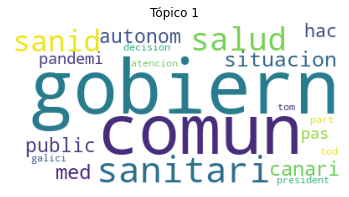

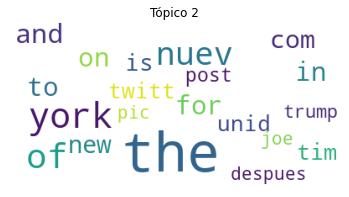

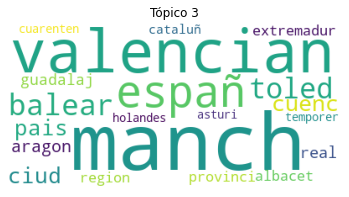

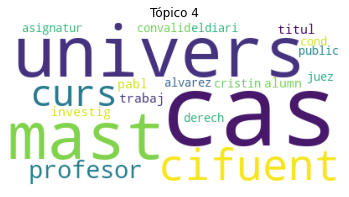

In [15]:
for i in range(1, 5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0).fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

#### Evaluación del modelo con un artículo de ejemplo ya visto
Para ello, escogemos una noticia aleatoriamente para evaluar si los tópicos escogidos por el modelo le representan.

In [16]:
indice_noticia = random.randint(0,len(df))
noticia = df.iloc[indice_noticia]
print("Titular: " + noticia.Titular)
print(noticia.Noticia)

Titular: El Polígono Sur y Los Pajaritos, en Sevilla, repiten como barrios más pobres de España según el informe anual del INE
La edición 2020 de los Indicadores Urbanos del Instituto Nacional de Estadística (INE), enmarcados en el proyecto europeo Urban Audit sobre las condiciones de vida en las ciudades de la Unión Europea, incluye de nuevo al Polígono Sur de Sevilla como el barrio de menor renta neta media anual por habitante de toda España, seguido otra vez de Los Pajaritos y Amate y con un total de seis barrios de la capital andaluza entre los 15 con menor renta neta media anual por persona de toda España.                  En este estudio, elaborado principalmente a partir de datos estadísticos correspondientes a 2017 y recogido por Europa Press, Los Palacios y Villafranca, en la provincia de Sevilla, vuelve a figurar como el segundo municipio español de más de 20.000 habitantes con menor renta neta media anual por persona, con 7.027 euros para tal indicativo.                  Ade

In [17]:
indice_noticia

5116

Obtenemos el BOW del artículo.

In [18]:
bow_noticia = corpus[indice_noticia]
bow_noticia

[(48, 3),
 (59, 1),
 (67, 5),
 (68, 1),
 (70, 1),
 (71, 1),
 (110, 1),
 (126, 1),
 (131, 1),
 (142, 1),
 (154, 2),
 (158, 1),
 (166, 1),
 (176, 1),
 (177, 1),
 (189, 4),
 (193, 1),
 (203, 1),
 (267, 2),
 (271, 1),
 (295, 1),
 (321, 9),
 (354, 1),
 (361, 1),
 (394, 6),
 (405, 2),
 (407, 1),
 (413, 2),
 (414, 2),
 (429, 2),
 (436, 8),
 (458, 1),
 (469, 2),
 (470, 2),
 (492, 4),
 (513, 1),
 (521, 6),
 (533, 2),
 (540, 1),
 (569, 2),
 (599, 8),
 (615, 7),
 (677, 2),
 (688, 1),
 (696, 1),
 (743, 1),
 (840, 1),
 (916, 1),
 (1007, 1),
 (1124, 2),
 (1130, 1),
 (1152, 2),
 (1217, 2),
 (1249, 1),
 (1287, 2),
 (1320, 1),
 (1335, 3),
 (1511, 1),
 (1552, 1),
 (1590, 1),
 (1601, 2),
 (1645, 2),
 (1798, 8),
 (1808, 8),
 (1851, 1),
 (1855, 2),
 (1858, 8),
 (1976, 2),
 (2034, 7),
 (2048, 1),
 (2251, 5),
 (2305, 6),
 (2666, 1),
 (2947, 2),
 (3184, 2),
 (3231, 1),
 (3485, 1),
 (3664, 1),
 (3837, 1),
 (4758, 1),
 (5538, 1),
 (8158, 1),
 (8311, 2),
 (8316, 2),
 (8318, 1),
 (8665, 1),
 (8866, 1),
 (9010, 1)

Usamos el modelo para obtener la distribución de los tópicos.

In [19]:
distribucion_noticia = lda[bow_noticia]

Sacamos los índices y la contribución (proporción) de los tópicos más significativos para nuestro artículo.

In [20]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_noticia]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_noticia]]

Mostramos en un gráfico los tópicos más importantes.

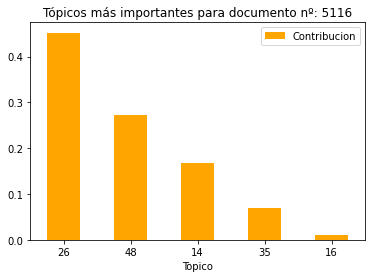

In [21]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="orange",
                                   title = "Tópicos más importantes para documento nº: " + str(indice_noticia))

Mostramos estos tópicos y sus palabras más significativas.

In [22]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 26 ***
millon, eur, econom, año, banc, españ, impuest, mayor, empres, sector 

*** Tópico: 48 ***
barri, social, viv, call, person, vecin, pobr, mes, pobrez, rent 

*** Tópico: 14 ***
andaluc, incendi, malag, sevill, zon, junt, andaluz, play, camp, segun 

*** Tópico: 35 ***
proyect, agu, desarroll, cambi, medi, climat, form, nuev, zon, ciud 

*** Tópico: 16 ***
rey, juan, carl, fiscal, suiz, español, emerit, investig, felip, millon 



#### Evaluación del modelo con un artículo nuevo

In [23]:
texto_articulo = open("noticia1.txt")
articulo_nuevo = texto_articulo.read().replace("\n", " ")
texto_articulo.close()

Realizamos el preprocesamiento al texto, al igual que hicimos con el conjunto de artículos.

In [24]:
articulo_nuevo = limpiar_texto(articulo_nuevo)
articulo_nuevo = tokenizer.tokenize(articulo_nuevo)
articulo_nuevo = filtrar_stopword_digitos(articulo_nuevo)
articulo_nuevo = stem_palabras(articulo_nuevo)
articulo_nuevo

['cantabri',
 'viv',
 'año',
 'negr',
 'refier',
 'violenci',
 'gener',
 'doc',
 'mes',
 'comun',
 'acumul',
 'total',
 'denunci',
 'mujer',
 'victim',
 'violenci',
 'machist',
 'año',
 'sald',
 'dos',
 'asesin',
 'man',
 'parej',
 'unas',
 'cifr',
 'sobrecog',
 'marc',
 'hoj',
 'rut',
 'segun',
 'reconoc',
 'viern',
 'portavoz',
 'gobiern',
 'autonom',
 'pabl',
 'zuloag',
 'present',
 'memori',
 'anual',
 'mal',
 'dat',
 'par',
 'ahi',
 'inform',
 'recog',
 'numer',
 'denunci',
 'present',
 'cantabri',
 'año',
 'pas',
 'supon',
 'cifr',
 'alta',
 'registr',
 'ahor',
 'dict',
 'total',
 'orden',
 'alej',
 'acus',
 'conden',
 'firm',
 'tribunal',
 'registr',
 'avergüenz',
 'socied',
 'expres',
 'vicepresident',
 'cantabri',
 'present',
 'segun',
 'memori',
 'centr',
 'inform',
 'atencion',
 'integral',
 'gobiern',
 'cantabri',
 'asesor',
 'mujer',
 'acud',
 'primer',
 'vez',
 'are',
 'mal',
 'trat',
 'mujer',
 'asist',
 'menor',
 'total',
 'person',
 'ingres',
 'centr',
 'emergent',
 'c

Lo siguiente será pasar el artículo a BOW, obtener los indices y contribucion de los tópicos más importantes y mostrarlos en un gráfico de barras.

In [25]:
bow_articulo_nuevo = diccionario.doc2bow(articulo_nuevo)

In [26]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_articulo_nuevo]]
# Contribucion de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_articulo_nuevo]]

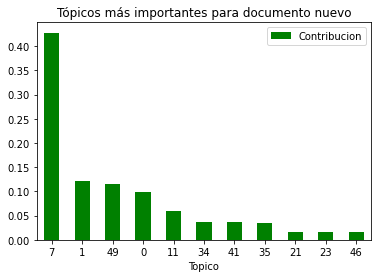

In [27]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', rot=0, color="green",
                                   title = "Tópicos más importantes para documento nuevo")

In [28]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 7 ***
mujer, sexual, violenci, gener, hombr, person, muj, femin, victim, iguald 

*** Tópico: 1 ***
gobiern, comun, sanitari, salud, sanid, situacion, med, canari, public, autonom 

*** Tópico: 49 ***
tribunal, fiscal, judicial, justici, derech, delit, suprem, cas, ley, sentenci 

*** Tópico: 0 ***
cas, resident, posit, person, dat, fallec, ultim, nuev, centr, cov 

*** Tópico: 11 ***
años, pas, cas, hac, dos, sal, lleg, dia, trabaj, llev 

*** Tópico: 34 ***
cantabri, santand, cantabr, miguel, mar, angel, salmeron, menendez, torrelaveg, ceip 

*** Tópico: 41 ***
franc, victim, español, españ, memori, civil, muert, polit, derech, iglesi 

*** Tópico: 35 ***
proyect, agu, desarroll, cambi, medi, climat, form, nuev, zon, ciud 

*** Tópico: 21 ***
person, migrant, lleg, inmigr, acog, refugi, fronter, españ, pais, rescat 

*** Tópico: 23 ***
navarr, cataluny, barcelon, catalan, generalitat, torr, govern, foral, independent, cataluñ 

*** Tópico: 46 ***
histori, libr, pelicul, c

Guardamos el modelo y el diccionario para usarlos posteriormente con el comando load.

In [29]:
lda.save("articulos.model")
diccionario.save("articulos.dictionary")

## Parte III: Similitud de documentos de texto

#### Importamos las librerías necesarias

In [54]:
from gensim.matutils import jensen_shannon

#### Prueba 1: Noticas más similares de una noticia sobre violencia de género

Distribución de tópicos de nuestra noticia sobre violencia de género.

In [61]:
distribucion_noticia = lda.get_document_topics(bow_articulo_nuevo, 
                                               minimum_probability=0)

Creamos un método para calcular la distancia entre dos documentos a partir de sus distribuciones de tópicos.

In [62]:
def calcular_jensen_shannon_sim_doc_doc(doc_dist1, doc_dist2):
    """Calcula la distancia Jensen Shannon entre dos documentos.
    """
    return jensen_shannon(doc_dist1, doc_dist2)

Implementamos un método que se encarga de calcular las distancias entre las distribuciones de tópicos de nuestra noticia con las del resto de noticias y muestra el titular de las más similares, es decir, las que tengan la distancia más baja, junto con la distancia.

In [63]:
def mostrar_n_mas_similares(distribucion_noticia, n):
    """Muestra las n noticias mas similares a partir 
       de una distribucion de tópicos.
    """
    distancias = [calcular_jensen_shannon_sim_doc_doc(
        distribucion_noticia, lda[noticia]) for noticia in corpus]
    mas_similares = np.argsort(distancias)
    for i in range(0,n):
        titular = df.iloc[int(mas_similares[i])].Titular
        print(f'{i + 1}: {titular} ({distancias[mas_similares[i]]})')

Mostramos las 10 noticias más similares.

In [64]:
mostrar_n_mas_similares(distribucion_noticia, 10)

1: El año arranca con el reto de reconocer la violencia machista fuera de la pareja tras los 47 asesinatos contabilizados en 2018 (0.09249553084373474)
2: La violencia machista deja mil mujeres asesinadas por hombres en los últimos dieciséis años (0.11838279664516449)
3: Más de 40 ciudades acogen manifestaciones contra la sentencia de la violación grupal de Manresa (0.1389278918504715)
4: Obligan a una niña argentina de 11 años violada a someterse a una cesárea en lugar de un aborto (0.16407731175422668)
5: La Fiscalía no probó ninguna denuncia falsa por violencia de género el año pasado (0.1668342649936676)
6: La atención sanitaria a las personas trans en Catalunya dejará de estar basada en un diagnóstico psiquiátrico (0.171798974275589)
7: El Parlamento de Navarra solicita por unanimidad medios para esclarecer los casos de abusos en la Iglesia (0.17249423265457153)
8: Por una ley integral contra la trata de personas (0.18349292874336243)
9: Fue violación: el Supremo condena a quince 

#### Prueba 2: Noticas más similares de una noticia sobre Trump

Realizamos una segunda prueba utilizando una noticia sobre Trump y las elecciones en Estados Unidos del 2020.

In [65]:
texto_articulo = open("noticia2.txt")
articulo_nuevo = texto_articulo.read().replace("\n", " ")
texto_articulo.close()
articulo_nuevo

' El Servicio Postal de Estados Unidos (USPS, por sus siglas en inglés) se ha convertido en los últimos días en protagonista de la pelea entre Donald Trump y los demócratas de cara a las elecciones del próximo 3 de noviembre.  El presidente clama contra "los riesgos de fraude del voto universal por correo" y dice que, si se permite, Estados Unidos será "el hazmerreír de todo el mundo".  Del otro lado, los demócratas, liderados por la presidenta de la Cámara de Representantes, Nancy Pelosi, denuncian que Trump encabeza "una campaña para sabotear las elecciones".  Este año, además, el país se encuentra en plena pandemia de coronavirus, lo que desanimará aún más a los electores a acudir a las urnas.  Se espera, por tanto, que el voto por correo alcance cifras récord y de ahí que haya cobrado especial relevancia en el debate político.  El propio servicio postal ha advertido que es posible que millones de papeletas no lleguen a tiempo de ser contadas. Distintos tipos de voto por correo  Son

Como siempre, preprocesamos el texto.

In [69]:
articulo_nuevo = limpiar_texto(articulo_nuevo)
articulo_nuevo = tokenizer.tokenize(articulo_nuevo)
articulo_nuevo = filtrar_stopword_digitos(articulo_nuevo)
articulo_nuevo = stem_palabras(articulo_nuevo)

Obtenemos la distribución de la noticia.

In [67]:
bow_articulo_nuevo = diccionario.doc2bow(articulo_nuevo)
distribucion_noticia = lda.get_document_topics(bow_articulo_nuevo, 
                                               minimum_probability=0)

Mostramos las 10 noticias más similares.

In [68]:
mostrar_n_mas_similares(distribucion_noticia, 10)

1: Trump contra el sistema democrático: "La única manera de perder estas elecciones es si están amañadas" (0.08675152063369751)
2: Trump redobla los ataques al voto por correo y Twitter alerta de datos engañosos (0.1108022928237915)
3: Trump, obligado a suspender las polémicas reformas del servicio postal en medio de su guerra contra el voto por correo (0.12227611988782883)
4: Trump desafía las restricciones de afluencia por el coronavirus con un mitin multitudinario en Nevada (0.12261532992124557)
5: Trump desacredita las encuestas y carga nuevamente contra el voto por correo: "Creo que va a amañar las elecciones" (0.13689066469669342)
6: Michelle Obama, protagonista en la apertura de la convención demócrata: "Trump no puede ser quien necesitamos que sea. Es lo que es" (0.138019859790802)
7: Elecciones disputadas, polarización y crisis constitucional en EEUU... La lección de 1876 para los comicios de 2020 (0.15536248683929443)
8: Obama advierte de que Trump está dispuesto a "derribar 